<a href="https://colab.research.google.com/github/lrnrdr/Classification-Cirrhosis-Dataset/blob/main/Project_2_Part_1_(Core)_Loraine_Rodriguez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Title: Project 2- Part 1 (Core)  


 ### By: Loraine Rodriguez

📅 Date: 10/20/23




---



## Reference: **Cirrhosis Prediction Dataset**
https://www.kaggle.com/datasets/fedesoriano/cirrhosis-prediction-dataset/data



---



## ✅ Instructions:

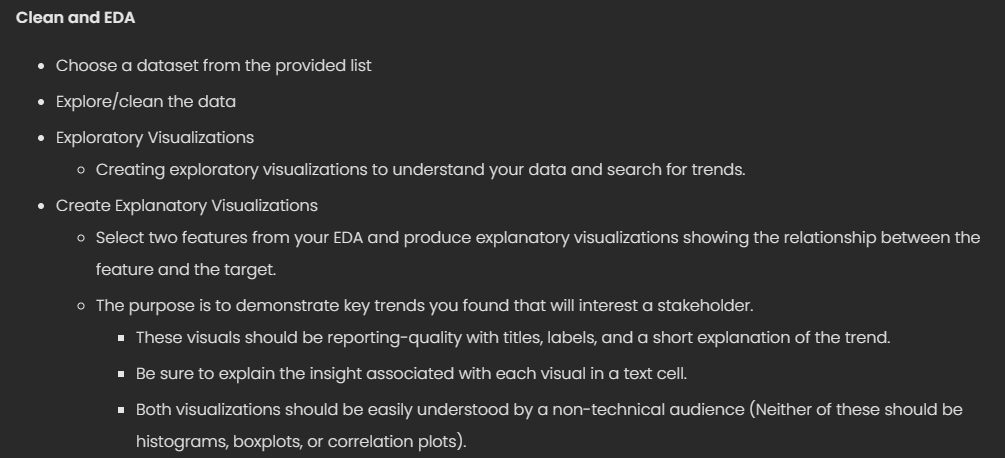

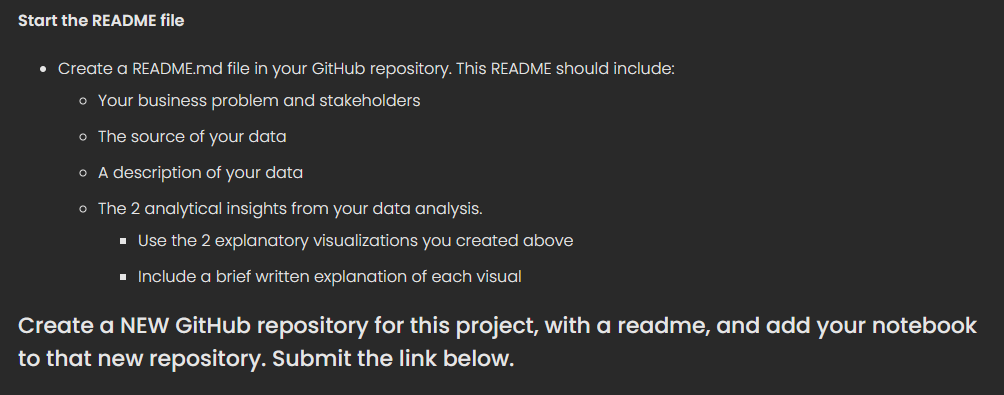



---



## ⌨ Data Dictionary:

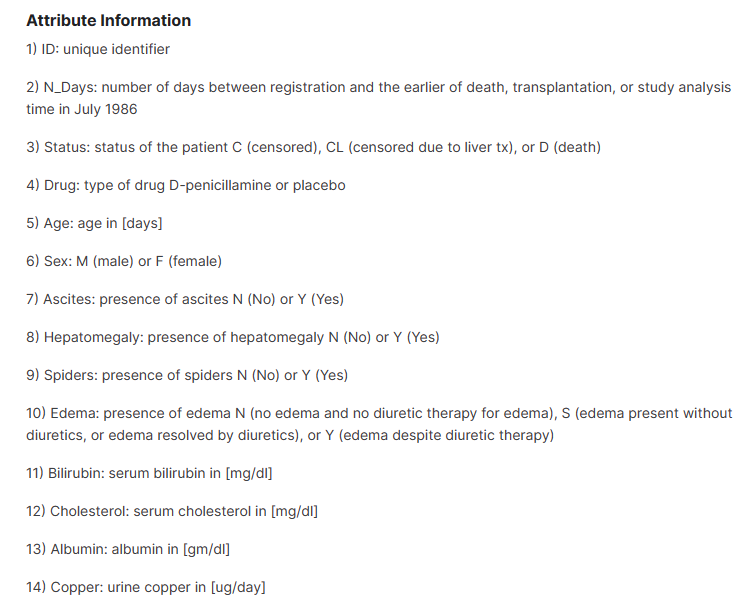

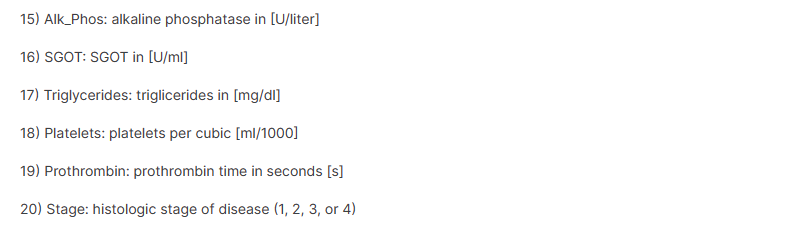



---



## Target: Predicting liver cirrhosis stage



---



# Mount drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




---



# ⚓ Imports:   

# 🛑  See example below: Adjust as needed
- Remove from (sklearn.impute import SimpleImputer) if we aren't simple imputing anything, if there are no missing values.

In [ ]:
## Pandas
import pandas as pd

## Numpy
import numpy as np

## MatPlotLib
import matplotlib.pyplot as plt

## Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Set the default transformation output to Pandas
from sklearn import set_config

## Warnings
import warnings

In [ ]:
## Set filter warnings to ignore
warnings.filterwarnings('ignore')

#### **Pandas Display Configurations**

In [ ]:
## Display all columns
pd.set_option('display.max_column', None)

## Display all rows
pd.set_option('display.max_rows', None)

#### **SK Learn Display Configuration**

In [ ]:
## SK Learn Display
set_config(display='diagram')

## Transformers output as a Pandas Dataframe
set_config(transform_output='pandas')



---



# ⏫ Upload Data:

In [ ]:
# Load data from folder structure
fpath = '/content/drive/MyDrive/CodingDojo/06-AdvancedML/Week21/Data/cirrhosis.csv'
df = pd.read_csv(fpath)
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi



---



# 🧹 Clean Data:



---



### **Remove Unnecessary Columns**

- RowNumber, CustomerId, and Surname are not going to be useful for predicting.  We will remove them.

In [ ]:
## Drop a single column
df.drop(columns = 'ID', inplace = True)



---



## ➿ Check for Duplicates:

In [ ]:
# Display the count the duplicate rows
df.duplicated().sum()

0

In [ ]:
## Drop duplicate rows
df = df.drop_duplicates()

In [ ]:
# Display the count the duplicate rows to check there are no more
df.duplicated().sum()

0

😸 There are 0 duplicate rows remaining



---



## Check for missing values.

In [ ]:
## Display the count of missing values by column
print(f'There are {df.isna().sum().sum()} missing values.')

There are 1033 missing values.


In [ ]:
df.isna().sum()

N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64



---



## 👓 Inspect unusual numbers (Look at min & max).  Do numbers make sense?

In [ ]:
# Display desriptive statitistics for all collumns
df.describe(include='number')

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


* Observations: No unusal numbers found



---



## Check object columns
## Check "Unique" - If its over 10 it has high cardinality, determine if it's okay to remove these rows.

In [ ]:
# Display desriptive statitistics for all collumns.
df.describe(include='object')

,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema
count,418,312,418,312,312,312,418
unique,3,2,2,2,2,2,3
top,C,D-penicillamine,F,N,Y,N,N
freq,232,158,374,288,160,222,354


In [ ]:
## Create a list of string columns
string_cols = df.select_dtypes('object').columns
string_cols

Index(['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object')

Evaluating string/object columns for issues

In [ ]:
## Loop through the list of string columns
for col in string_cols:
  ## Print the column name
  print(col)
  ## print the value counts for the column
  print(df[col].value_counts(dropna=False))
  ## Print an empty line for readability
  print()

Status
C     232
D     161
CL     25
Name: Status, dtype: int64

Drug
D-penicillamine    158
Placebo            154
NaN                106
Name: Drug, dtype: int64

Sex
F    374
M     44
Name: Sex, dtype: int64

Ascites
N      288
NaN    106
Y       24
Name: Ascites, dtype: int64

Hepatomegaly
Y      160
N      152
NaN    106
Name: Hepatomegaly, dtype: int64

Spiders
N      222
NaN    106
Y       90
Name: Spiders, dtype: int64

Edema
N    354
S     44
Y     20
Name: Edema, dtype: int64



## **No issues noted in object/string columns**



---





---



**Target value counts**
(Has Missing Values)

In [ ]:
df['Stage'].value_counts(dropna=False)

3.0    155
4.0    144
2.0     92
1.0     21
NaN      6
Name: Stage, dtype: int64



---

Notes On observations of columns and types

**Categorical Nominal Columns:**

1. Status
2. Drug (Missing Values)
3. Sex
4. Ascites (Missing Values)
5. Hepatomegaly (Missing Values)
6. Spiders (Missing Values)
7. Edema


**Numerical Columns:**

1. Cholesterol (Missing Values)
2. Copper (Missing Values)
3. Alk_Phos (Missing Values)
4. SGOT (Missing Values)
5. Tryglicerides (Missing Values)
6. Platelets (Missing Values)
7. Prothrombin (Missing Values)
8. N_Days
9. Age
10. Bilirubin
11. Albumin



**Categorical Ordinal Columns:**

1. Stage (Target) & (Missing Values) - I feel this is categorical ordinal even though they are numeric dytpe.  As the number goes up that means its a worse stage of disease.  I feel that each number has a distinct ordering.   Will evaluate and do more research on addressing missing values on target.

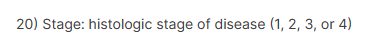

More notes on LP Week 1: Ordinal and One HotEncoder in Python-  has ordinal encoder https://login.codingdojo.com/m/688/16335/121057



---



# **EDA**




In [ ]:
# Updating function
def plot_categorical_vs_target(df, x, y, figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None, target_type='reg'):
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)
  # REGRESSION-TARGET PLOT
  if target_type=='reg': #Added if statement here
    # Barplot
    sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
                linewidth=1, edgecolor='black', errorbar=None)
    # Boxplot
    sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                  order=order, hue_order=order, legend=False,
                  edgecolor='white', linewidth=0.5,
                  size=3,zorder=0)
  # CLASSIFICATION-TARGET PLOT # This is the new code for the classification task
  elif target_type=='class':
    ax = sns.histplot(data=temp_df, hue=y, x=x, stat='percent',  multiple='fill')
  # Rotate xlabels
  ax.set_xticks(ax.get_xticks()) # Added this to prevent a bug
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title
  ax.set_title(f"{x} vs. {y}")
  fig.tight_layout()
  return fig, ax



In [ ]:
import seaborn as sns

# Exploratory Visualation #1

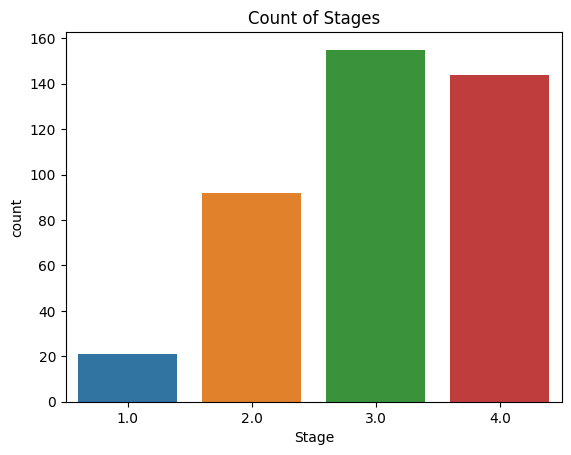

In [ ]:
# Horizontal grouped boxplot in seaborn
ax = sns.countplot(x=df['Stage'])
ax.set_title("Count of Stages");


Stage 3 had the highest count of all the Stageswith a count of about 155.  Followed by Stage 4 with a count of about 140.  The lowest count was Stage 1 with around 20.

# Exploratory Visualation #2

In [ ]:
# Get correlations
corr = df.corr(numeric_only = True)
corr.round(2)

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
N_Days,1.00,-0.13,-0.40,-0.14,0.43,-0.36,0.15,-0.23,-0.15,0.15,-0.11,-0.37
Age,-0.13,1.00,0.00,-0.16,-0.18,0.06,-0.05,-0.15,0.02,-0.15,0.11,0.19
Bilirubin,-0.40,0.00,1.00,0.40,-0.31,0.46,0.12,0.44,0.44,-0.01,0.31,0.20
Cholesterol,-0.14,-0.16,0.40,1.00,-0.07,0.13,0.15,0.35,0.28,0.19,-0.03,0.01
Albumin,0.43,-0.18,-0.31,-0.07,1.00,-0.26,-0.10,-0.22,-0.10,0.16,-0.20,-0.31
Copper,-0.36,0.06,0.46,0.13,-0.26,1.00,0.19,0.29,0.28,-0.06,0.22,0.27
Alk_Phos,0.15,-0.05,0.12,0.15,-0.10,0.19,1.00,0.11,0.18,0.14,0.09,0.04
SGOT,-0.23,-0.15,0.44,0.35,-0.22,0.29,0.11,1.00,0.13,-0.12,0.11,0.16
Tryglicerides,-0.15,0.02,0.44,0.28,-0.10,0.28,0.18,0.13,1.00,0.10,0.02,0.12
Platelets,0.15,-0.15,-0.01,0.19,0.16,-0.06,0.14,-0.12,0.10,1.00,-0.17,-0.25


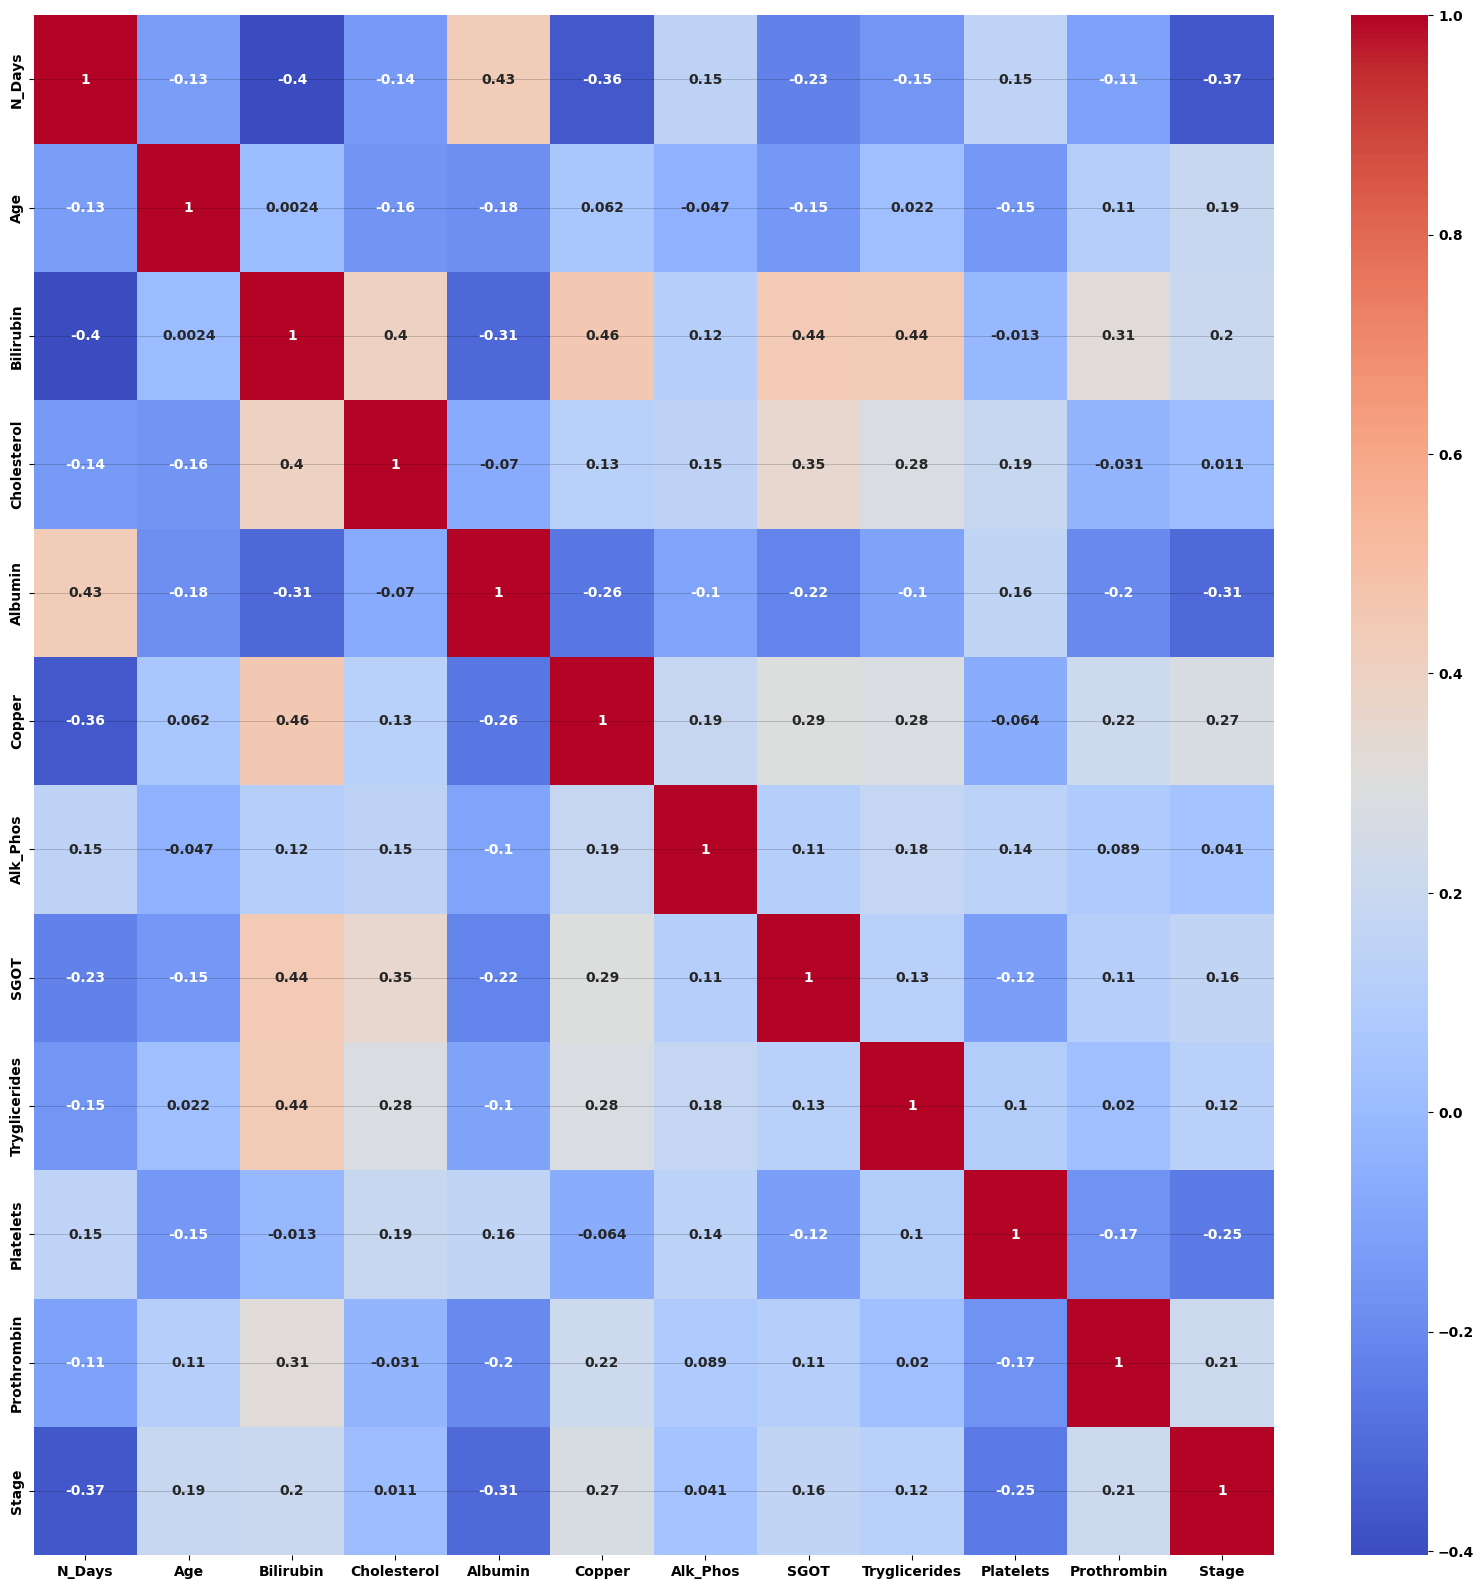

In [ ]:
# Create a fig, ax with a figsize argument
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, cmap = 'coolwarm', annot = True, ax=ax);

Albumin has the highest correlation connected with the Stages of Cirrhosis.  Alk_Phos and Platelets are also correlated with the Stages of Cirrhosis.



---

